In [ ]:
# https://programminghistorian.org/en/lessons/sentiment-analysis
# https://textblob.readthedocs.io/en/dev/quickstart.html#spelling-correction
# https://www.kaggle.com/ssishu/factual-authenticity-analysis-of-tweets
# https://medium.com/datadriveninvestor/nlp-with-lda-analyzing-topics-in-the-enron-email-dataset-20326b7ae36f

In [97]:
import nltk
from nltk.corpus import stopwords
# just uncomment to download these once
#nltk.download('vader_lexicon')
#nltk.download('punkt')


In [98]:
# textblob sentiment analysis
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import pandas as pd
import numpy as np

In [99]:
tweets = pd.read_csv("../Cleaned Tweets/cleaned_nyc_popular_tweet_data.csv")

df = pd.DataFrame(data=tweets["Text"])
df.insert(1,column="retweets",value=tweets["retweets"])

# change to string
df["Text"] = df['Text'].astype(str)
df["retweets"] = df['retweets'].astype(int)

dfClean = df.copy()
dfClean.insert(1,column="cleanText",value=tweets["cleanText"])

#print(dfClean)

                                                    Text  \
0      It would be interesting to see if the Wuhan co...   
1      CBP Enacts ‘Enhanced Health Screening’ as Chin...   
2      Chinese coronavirus may have been lurking in a...   
3      CDC and WHO are learning more about this new c...   
4      My take: China is doing a massive cover up & p...   
...                                                  ...   
10395  Piers Morgan temporarily steps back from Good ...   
10396  #JAEHYUN: we dont stan coronavirus in this house    
10397  Hoarding Supplies...https://www.replytonews.co...   
10398       ...it’s called sarcasm, world. #coronavirus    
10399  President Trump is seeing support slide among ...   

                                               cleanText  retweets  
0      it would interesting see wuhan coronavirus bin...         4  
1      cbp enacts ‘ enhanced health screening ’ chine...       369  
2         chinese coronavirus may lurking animal decade         18  
3  

In [100]:
polarity = np.zeros(len(df))
subjectivity = np.zeros(len(df))
polarityClean = np.zeros(len(df))
subjectivityClean = np.zeros(len(df))


for item in range(len(df)):
    polarity[item] = TextBlob(df['Text'][item]).sentiment[0]
    subjectivity[item] = TextBlob(df['Text'][item]).sentiment[1]
    
    polarityClean[item] = TextBlob(dfClean['cleanText'][item]).sentiment[0]
    subjectivityClean[item] = TextBlob(dfClean['cleanText'][item]).sentiment[1]
    
df.insert(2,column="polarity",value=polarity)
df.insert(3,column="subjectivity",value=subjectivity)

dfClean.insert(2,column="polarityClean",value=polarityClean)
dfClean.insert(3,column="subjectivityClean",value=subjectivityClean)

# clean the text data
#remove special characters
#df['Text'] = df['Text'].str.replace('[^ws]','')
#lowercase everything
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# remove unimportant kinds of words that dont add value
unimportant = stopwords.words('english')
# not going to do stemming because this is twitter and people mispell things all the time
#acutlaly, here we can use textblob to correct the words spelling?


In [101]:
#  sentiment using vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
senti = SentimentIntensityAnalyzer()

pos = np.zeros(len(df))
neg = np.zeros(len(df))
neu = np.zeros(len(df))
comp = np.zeros(len(df))

posC = np.zeros(len(df))
negC = np.zeros(len(df))
neuC = np.zeros(len(df))
compC = np.zeros(len(df))

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

for item in range(len(df)):
    s = senti.polarity_scores(df['Text'][item])
    
    pos[item] = s['pos']
    neg[item] = s['neg']
    neu[item] = s['neu']
    comp[item] = s['compound']  
    
    sC = senti.polarity_scores(dfClean['cleanText'][item])
    
    posC[item] = sC['pos']
    negC[item] = sC['neg']
    neuC[item] = sC['neu']
    compC[item] = sC['compound']

df.insert(4,column="pos",value=pos)
df.insert(5,column="neg",value=neg)
df.insert(6,column="neu",value=neu)
df.insert(7,column="comp",value=comp)

dfClean.insert(4,column="posC",value=posC)
dfClean.insert(5,column="negC",value=negC)
dfClean.insert(6,column="neuC",value=neuC)
dfClean.insert(7,column="compC",value=compC)

In [102]:
print(df)
print("ho")
print(dfClean)

                                                    Text  retweets  polarity  \
0      it would be interesting to see if the wuhan co...         4  0.250000   
1      cbp enacts ‘enhanced health screening’ as chin...       369  0.000000   
2      chinese coronavirus may have been lurking in a...        18  0.000000   
3      cdc and who are learning more about this new c...         2  0.133247   
4      my take: china is doing a massive cover up & p...         5 -0.016667   
...                                                  ...       ...       ...   
10395  piers morgan temporarily steps back from good ...         9  0.344444   
10396   #jaehyun: we dont stan coronavirus in this house        18  0.000000   
10397  hoarding supplies...https://www.replytonews.co...         6  0.000000   
10398        ...it’s called sarcasm, world. #coronavirus         8  0.000000   
10399  president trump is seeing support slide among ...       163  0.000000   

       subjectivity    pos    neg    ne

In [103]:
# now we pull in a beefy training set for the sentiment
sentimentTrainingData = pd.read_csv("resources/cleanTrainingSet.csv",encoding='latin-1', header=1)
sentimentTrainingData.columns = ["id", "sentiment", "text", "cleanText"]
sentimentTrainingData = sentimentTrainingData.drop(["id"], axis = 1)
sentimentTrainingData.head()

,sentiment,text,cleanText
0,0,is upset that he can't update his Facebook by ...,upset can not update facebook texting it might...
1,0,@Kenichan I dived many times for the ball. Man...,i dived many time ball managed save 50 the res...
2,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire
3,0,"@nationwideclass no, it's not behaving at all....",no behaving all i mad here i can not see there
4,0,@Kwesidei not the whole crew,whole crew


In [104]:
print(type(sentimentTrainingData['text'][1]))
print(type(sentimentTrainingData['cleanText'][1]))

<class 'str'>
<class 'str'>


In [105]:
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import word_tokenize # import word_tokenize
import re 

sentimentTrainingData['cleanText'] = sentimentTrainingData['cleanText'].astype(str)
wordTokens = sentimentTrainingData['cleanText'].apply(lambda x: x.split())

print(wordTokens)

0          [upset, can, not, update, facebook, texting, i...
1          [i, dived, many, time, ball, managed, save, 50...
2                     [whole, body, feel, itchy, like, fire]
3          [no, behaving, all, i, mad, here, i, can, not,...
4                                              [whole, crew]
                                 ...                        
1599994    [just, woke, up, having, school, best, feeling...
1599995    [thewdbcom, very, cool, hear, old, walt, inter...
1599996            [are, ready, mojo, makeover, ask, detail]
1599997    [happy, 38th, birthday, boo, alll, time, tupac...
1599998                              [happy, charitytuesday]
Name: cleanText, Length: 1599999, dtype: object


In [106]:
from nltk.stem.porter import *
stemmer = PorterStemmer() 
sentimentTrainingData['cleanText'] = sentimentTrainingData['cleanText'].apply(lambda x: [stemmer.stem(i) for i in x])

In [113]:
sentimentTrainingData['cleanText'] = sentimentTrainingData['cleanText'].apply(lambda x: ''.join([w for w in x]))
sentimentTrainingData['cleanText'].head()

0    upset can not update facebook texting it might...
1    i dived many time ball managed save 50 the res...
2                     whole body feel itchy like fire 
3      no behaving all i mad here i can not see there 
4                                          whole crew 
Name: cleanText, dtype: object

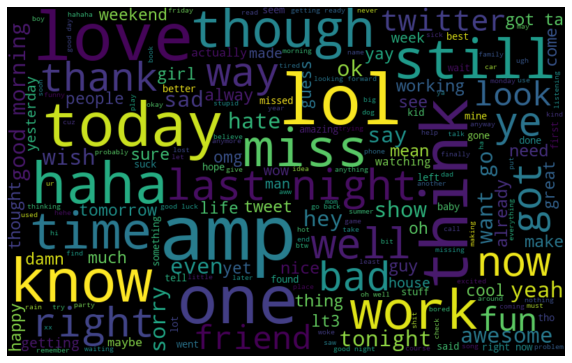

In [108]:
import matplotlib.pyplot as plt
all_words = ''.join([text for text in sentimentTrainingData['cleanText']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [122]:
wordTokens = sentimentTrainingData['cleanText']
#print(wordTokens)
print(len(wordTokens))
print(sentimentTrainingData['cleanText'].head())
'''
df1 = [] # initialize list df1 to store words after lemmatization
from nltk.stem import WordNetLemmatizer # import WordNetLemmatizer from nltk.stem
lemmatizer = WordNetLemmatizer() # create an object of WordNetLemmatizer
for l in word_tokens: # for loop for every tokens in word_token
    b = [lemmatizer.lemmatize(q) for q in l] #for every tokens in word_token lemmatize word and giev it to b
    df1.append(b) #append b to list df1
'''
'''
clean_df1 =[] # initialize list clean_df1 to join word tokens after lemmatization
for c in df1:  # for loop for each list in df1
    a = " ".join(c) # join words in list with space in between and giev it to a
    clean_df1.append(a) # append a to clean_df1
'''    
cleanTrainingSet = pd.DataFrame(sentimentTrainingData['cleanText'][:],columns=['text']) # convert clean_tweet_texts into dataframe and name it as clean_df
cleanTrainingSet['target'] = sentimentTrainingData.sentiment # from earlier dataframe get the sentiments of each tweet and make a new column in clean_df as target and give it all the sentiment score
#clean_df
print(len(cleanTrainingSet))
print(cleanTrainingSet.head())

1599999
0    upset can not update facebook texting it might...
1    i dived many time ball managed save 50 the res...
2                     whole body feel itchy like fire 
3      no behaving all i mad here i can not see there 
4                                          whole crew 
Name: cleanText, dtype: object
1599999
  text  target
0  NaN       0
1  NaN       0
2  NaN       0
3  NaN       0
4  NaN       0


In [123]:
import sklearn
from sklearn.naive_bayes import MultinomialNB # import Multinomial Naive Bayes model from sklearn.naive_bayes
from sklearn.feature_extraction.text import TfidfVectorizer #  import TF-idf vectorizer

X = sentimentTrainingData['cleanText'] # get all the text in x variable
y = sentimentTrainingData.sentiment
vect = TfidfVectorizer(analyzer = "word", ngram_range=(1,3)) # Get Tf-idf object and save it as vect. We can select features from here we just have simply change 

print(X)


0          upset can not update facebook texting it might...
1          i dived many time ball managed save 50 the res...
2                           whole body feel itchy like fire 
3            no behaving all i mad here i can not see there 
4                                                whole crew 
                                 ...                        
1599994        just woke up having school best feeling ever 
1599995    thewdbcom very cool hear old walt interview Ã¢...
1599996                  are ready mojo makeover ask detail 
1599997    happy 38th birthday boo alll time tupac amaru ...
1599998                                happy charitytuesday 
Name: cleanText, Length: 1599999, dtype: object


In [126]:
from sklearn.model_selection import train_test_split #from sklearn.cross_validation import train_test_split to split the data into training and tesing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 1) # split the data into traing and testing set where ratio is 80:20


# X_train is the tweets of training data, X_test is the testing tweets which we have to predict, y_train is the sentiments of tweets in the traing data and y_test is the sentiments of the tweets  which we will use to measure the accuracy of the model


vect.fit(X_train) # fit or traing data tweets to vect
X_train_dtm = vect.transform(X_train) # transform our training data tweets
X_test_dtm = vect.transform(X_test)# transform our testing data tweets

from sklearn.naive_bayes import MultinomialNB # import Multinomial Naive Bayes model from sklearn.naive_bayes
nb = MultinomialNB(alpha = 10) # get object of Multinomial naive bayes model with alpha parameter = 10

nb.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the multinomial naive bayes model

from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = nb, X = X_train_dtm, y = y_train, cv = 10) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

In [132]:

y_pred_nb = nb.predict(X_test_dtm) # predict the sentiments of testing data tweets


from sklearn import metrics # import metrics from sklearn
print(metrics.accuracy_score(y_test, y_pred_nb)) # measure the accuracy of our model on the testing data

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)

0.780834375
[[129591  30540]
 [ 39593 120276]]


In [133]:
import pickle
filename = 'trained_sentiment_model.sav'
pickle.dump(nb, open(filename, 'wb'))

import joblib
joblib.dump(vect, 'tfidfVectorizer.pkl')
joblib.dump(nb, 'classifier.pkl')

['classifier.pkl']

In [ ]:
print((df['polarity'] == 0).sum())
print((dfClean['polarityClean'] == 0).sum())

print((df['pos'] == 0).sum())
print((dfClean['posC'] == 0).sum())
